In [ ]:
# General
import pandas as pd
import numpy as np
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Models
import joblib
from sklearn.ensemble import RandomForestClassifier ,  GradientBoostingClassifier

# Qualitative analysis
import shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.5 MB/s 


In [ ]:
# Set plot parameters
import matplotlib as mpl
FONTSIZE = 18

mpl.rcParams['font.family'] = 'Arial'
plt.rc('font',family='Arial', size=FONTSIZE)
plt.rc('axes', titlesize=FONTSIZE + 7, labelsize=FONTSIZE)
plt.rc('xtick', labelsize=FONTSIZE)
plt.rc('ytick', labelsize=FONTSIZE)
plt.rc('legend', fontsize=FONTSIZE)

# For ipynb
%matplotlib inline

In [ ]:
shap.__version__

'0.41.0'

In [ ]:
# Model
#model_ml = joblib.load('model_bst_oversampled.sav')
model_ml_2 = joblib.load('model_rfc_oversampled.sav')

In [ ]:
# Trainset (SMOTE)
x_train = pd.read_csv('x_train_SMOTE.csv')
y_train = pd.read_csv('y_train_SMOTE.csv')

In [ ]:
# Testset
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
# Best model parameters
model_ml.get_params()

NameError: ignored

In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Patient admission  90 non-null     int64
dtypes: int64(1)
memory usage: 848.0 bytes


# Qualitative 1 - Feature Importance (only Ensemble/LR models)

In [ ]:
df_featImp = pd.DataFrame(columns=['Feature', 'Importance'])
df_featImp['Feature'] = x_train.columns
df_featImp['Importance'] = model_ml_2.feature_importances_
df_featImp.sort_values('Importance', ascending=False, inplace=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


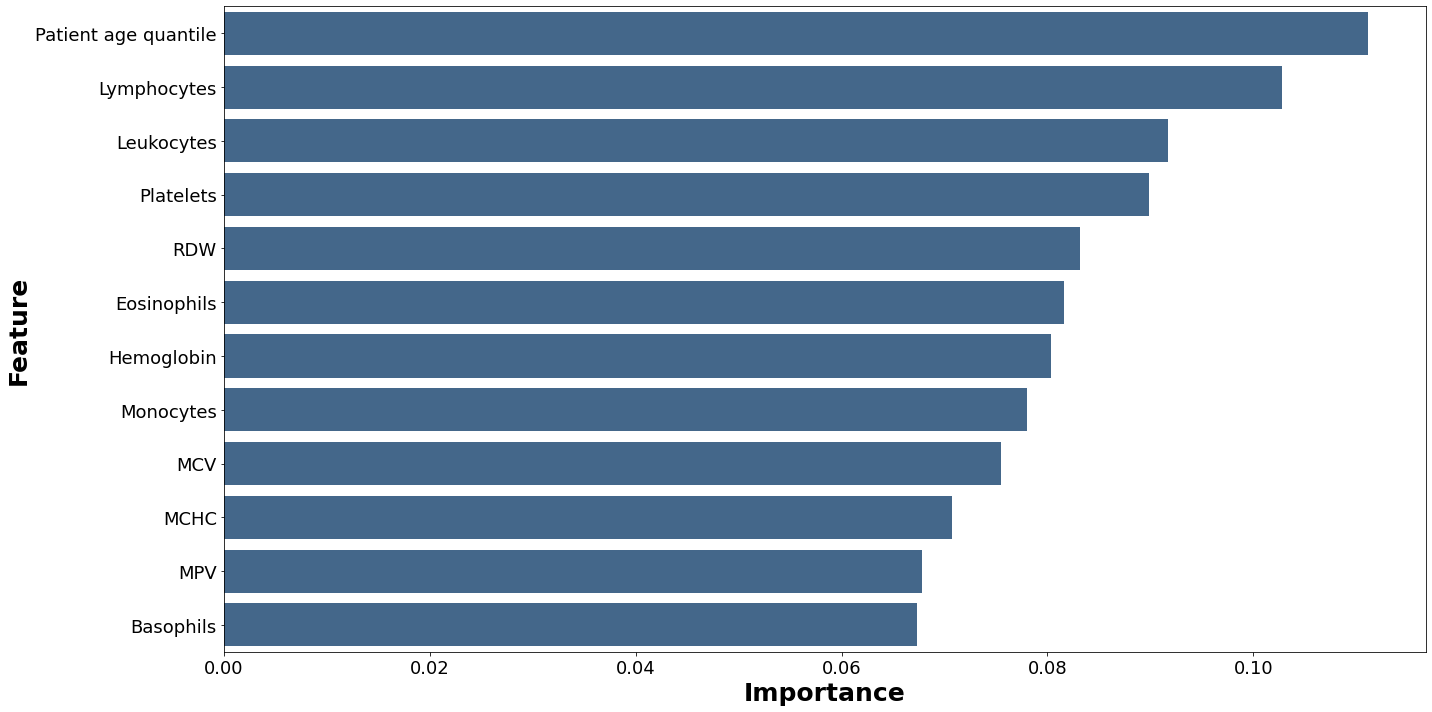

In [ ]:
# Plot
fig = plt.figure(figsize=(20,10))
sns.barplot(x="Importance",y='Feature', data=df_featImp, color='#386796')
plt.xlabel('Importance',fontsize=25,fontweight='bold')
plt.ylabel('Feature',fontsize=25,fontweight='bold')
plt.tight_layout()
plt.show()
fig.savefig('feature_importance.png', bbox_inches='tight')
plt.close();

# Qualitative 2 - Scatter Plots for relevant features

## Plots - Feature VS COVID-19 Presence

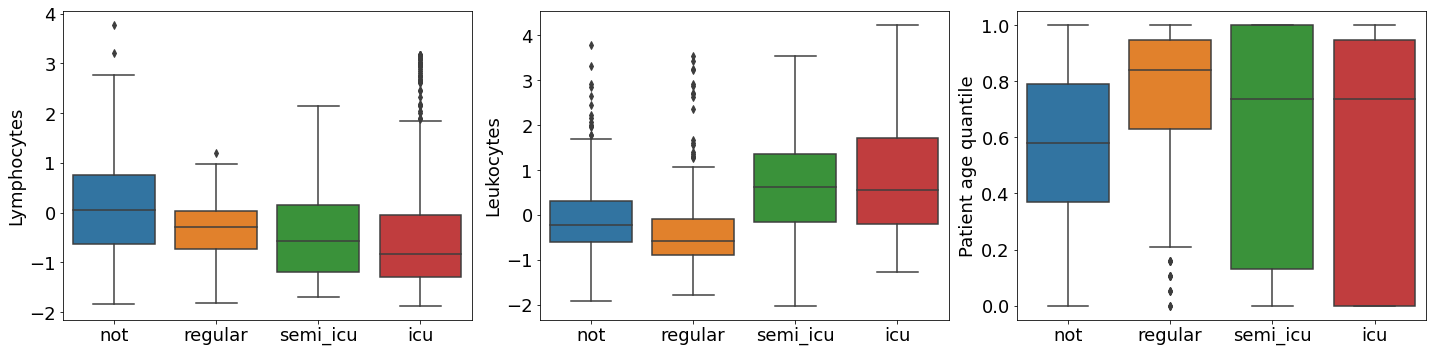

In [ ]:
#mpl.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.boxplot(x=y_train['Patient admission'], y=x_train['Lymphocytes'], ax=ax[0])
sns.boxplot(x=y_train['Patient admission'], y=x_train['Leukocytes'], ax=ax[1])
sns.boxplot(x=y_train['Patient admission'], y=x_train['Patient age quantile'], ax=ax[2])
ax[0].set_xlabel('');
ax[1].set_xlabel('');
ax[2].set_xlabel('');
ax[0].set_xticklabels(['not','regular', 'semi_icu', 'icu']);
ax[1].set_xticklabels(['not','regular', 'semi_icu', 'icu']);
ax[2].set_xticklabels(['not','regular', 'semi_icu', 'icu']);
plt.tight_layout()
plt.show()
fig.savefig('boxplot_imp_features.png', bbox_inches='tight')
plt.close();

# Qualitative analysis 3 - SHAP

## Prepare SHAP

In [ ]:
# Original (margin) result explainer
explainer = shap.TreeExplainer(model=model_ml)

AssertionError: ignored

In [ ]:
# Get SHAP values for trainset
shap_values_train = explainer.shap_values(x_train,y_train)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


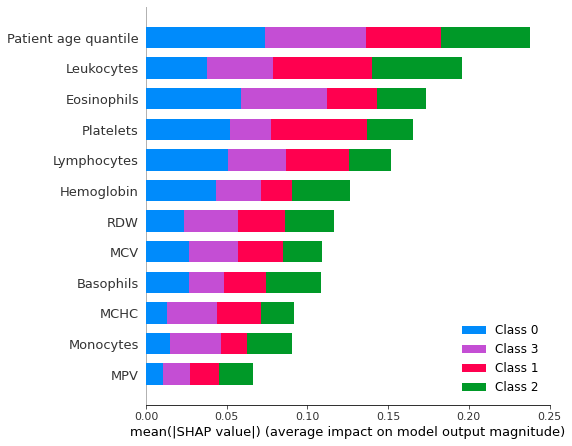

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize the effects of all the features - Class 1
fig = plt.figure(figsize=(20,20))
shap.summary_plot(shap_values_train, x_train, plot_type="bar")
plt.tight_layout()
plt.show()
fig.savefig('shap_summary.png', bbox_inches='tight');
plt.close();

## Plot 3.1 - Trainset Overall contributions

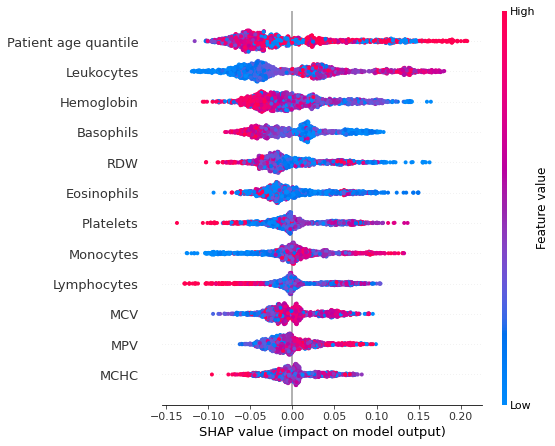

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize the effects of all the features - Class 1
fig = plt.figure(figsize=(20,20))
shap.summary_plot(shap_values_train[2], x_train, plot_type="dot")
plt.tight_layout()
plt.show()




fig.savefig('shap_summary.png', bbox_inches='tight');
plt.close();

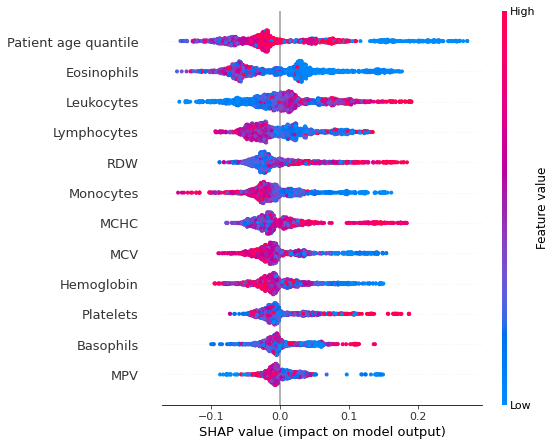

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize the effects of all the features - Class 1
fig = plt.figure(figsize=(20,20))
shap.summary_plot(shap_values_train[3], x_train, plot_type="dot")
plt.tight_layout()
plt.show()
fig.savefig('shap_summary.png', bbox_inches='tight');
plt.close();

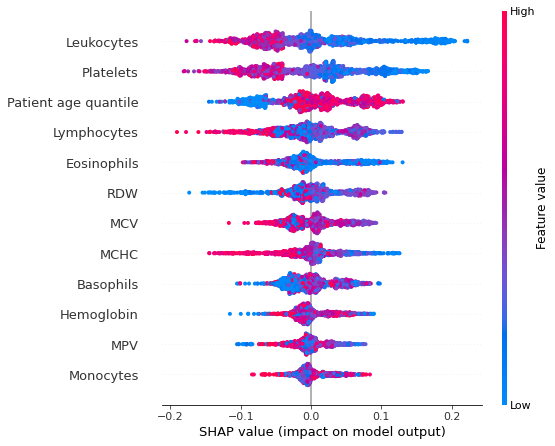

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize the effects of all the features - Class 1
fig = plt.figure(figsize=(20,20))
shap.summary_plot(shap_values_train[1], x_train, plot_type="dot")
plt.tight_layout()
plt.show()
fig.savefig('shap_summary.png', bbox_inches='tight');
plt.close();

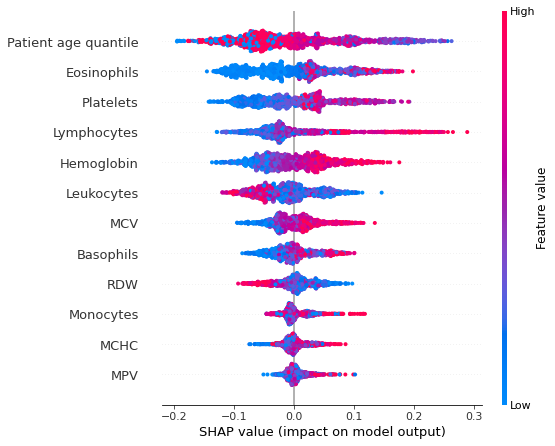

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize the effects of all the features - Class 1
fig = plt.figure(figsize=(20,20))
shap.summary_plot(shap_values_train[0], x_train, plot_type="dot")
plt.tight_layout()
plt.show()
fig.savefig('shap_summary.png', bbox_inches='tight');
plt.close();

## Plot 3.2 - Backtest Wrong results with SHAP Analysis

### Get wrong samples by chosen model

In [ ]:
# Predict
y_pred_resp = model_ml.predict(x_resp)

In [ ]:
# Get indexes where the model got a wrong predict, i.e. said that the pacient got COVID-19
idx_resp = np.where(y_resp != y_pred_resp)[0]

In [ ]:
# Samples size
print('From',len(x_resp),'samples',len(idx_resp),'was predicted as False Positive')

From 26 samples 2 was predicted as False Positive


In [ ]:
# Get samples
sample_resp = x_resp.loc[idx_resp,:]

In [ ]:
# Get baseline value (threshold selection)
expected_value = explainer.expected_value
expected_value

array([0.49955467, 0.50044533])

### SHAP plot - Eval an wrong sample of Any Respiratory Disease

In [ ]:
# Calculate SHAP for that first wrong sample
shap_values_backtest = explainer.shap_values(sample_resp.loc[idx_resp[0],:])

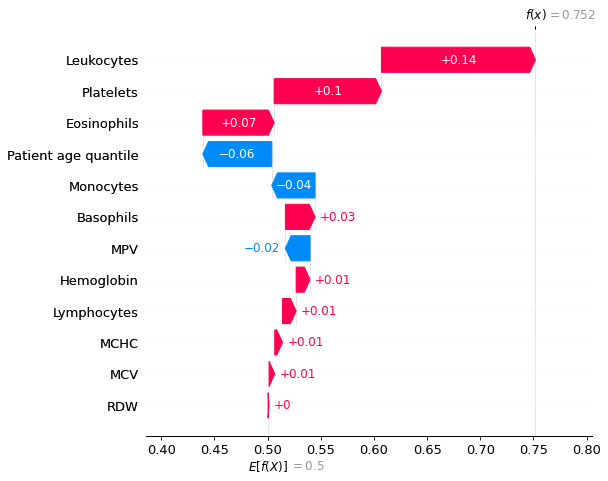

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot SHAP
fig = plt.figure(figsize=(20,10))
shap.plots._waterfall.waterfall_legacy(expected_value[1], shap_values_backtest[1].reshape(-1), None,
                                       feature_names=x_train.columns, max_display=15);
plt.tight_layout();
plt.show();
fig.savefig('shap_backtest1.png', bbox_inches='tight');
plt.close();

In [ ]:
# Calculate SHAP for that first wrong sample
shap_values_backtest = explainer.shap_values(sample_resp.loc[idx_resp[1],:])

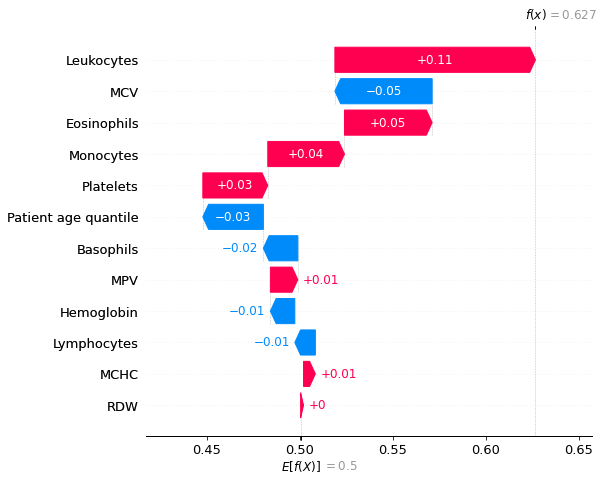

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot SHAP
fig = plt.figure(figsize=(20,10))
shap.plots._waterfall.waterfall_legacy(expected_value[1], shap_values_backtest[1].reshape(-1), None,
                                       feature_names=x_train.columns, max_display=15);
plt.tight_layout();
plt.show();
fig.savefig('shap_backtest2.png', bbox_inches='tight');
plt.close();

## Plot 3.3 - PDP plot

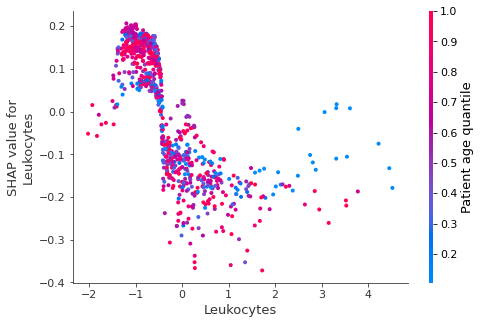

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Leukocytes", shap_values_train[1], x_train, interaction_index='Patient age quantile')